# Empowerment Week 1: Automation Bias

<div style="border-left: 6px solid rgba(69, 157, 185, 1);border-radius:5px; box-shadow: 3px 3px 3px rgba(221, 221, 221, 1);" >
    <p style="background-color: rgba(69, 157, 185, 0.1); font-weight:bold; padding: 8px 0 8px 15px;">How to use this notebook</p>
    <div style="padding: 0 0 2px 10px;">

Simply read the text and **follow the instructions**.  
This notebook contains **code cells**, which can be modified and must be **executed** to see the result of their content.  
To execute a cell, select it and click on the play button (▶) in the tool  bar, or type `Shift + Enter` or `Ctr + Enter`.  

As the variables contained in a cell are stored in memory, the **order of execution** of the cells is important!  

Notebook by Mattéo Berthet and the Responsible Software TAs team (2024).  
Except where otherwise noted, the content of this notebook is licensed under a <a rel="license" href="http://creativecommons.org/licenses/by/4.0/">Creative Commons Attribution International License</a> (CC BY 4.0 International).<br/>
<a rel="license" href="http://creativecommons.org/licenses/by/4.0/"><img alt="Creative Commons License" style="border-width:0;margin-top:10px;" src="https://i.creativecommons.org/l/by/4.0/88x31.png" /></a>

---

# Introduction

Welcome to this week's exercise session of CS-290 Responsible Software!

We start this Empowerment 1 module with an exploration of the issue of **automation bias**, that is to say the tendency of humans to over-trust and over-rely on automated systems.  
For this, we are going to reproduce a *simplified version* of the study published in 2020 (which you don't need to read): Suresh, H., Lao, N., & Liccardi, I. (2020). Misplaced Trust: Measuring the Interference of Machine Learning in Human Decision-Making. 12th ACM Conference on Web Science, 315–324. https://doi.org/10.1145/3394231.3397922


Let's get started!

<div style="border-left: 6px solid rgba(69, 157, 185, 1);border-radius:5px; box-shadow: 3px 3px 3px rgba(221, 221, 221, 1);" >
    <p style="background-color: rgba(69, 157, 185, 0.1); font-weight:bold; padding: 8px 0 8px 15px;">Learning Goals</p>
    <div style="padding: 0 0 2px 10px;">
    
**What will be covered:**
- **Part 1:** The concept of automation bias on human decision-making for a specific task.
- **Part 2:** Genreralization of this concept to other tasks.
- **Part 3:** The impact of automation bias on medical diagnosis.

**By the end of the session you will be able to:**
- ✅ Understand the concept of automation bias.
- ✅ Identify the potential consequences of automation bias.
- ✅ Discuss the impact of automation bias on medical diagnosis.
- ✅ Use pandas to handle columns of dataset to perform data analysis.
  
</div></div>
<br/>

---

# PART 1: Crowd analysis

In this first part, we are analyzing how individuals respond to recommendations from a Machine Learning model in a specific tasks: identifying the number of people in a crowd.  

**Crowd Analysis Task**:  
For this study, individual participants had to respond to a series of questions, where each question displayed a pair of crowd images and participants were asked to identify which image had the most people.  
The image selected by the participant could be either correct i.e., had the most people (scored 1) or incorrect (scored 0).  

**ML recommendations**:  
For some of the questions (not all), participants received recommendations from a ML model.  
These recommendations could be either correct (the ML model provided the right answer) or incorrect (the ML model provided the wrong answer).  
However, participants were not informed of the correctness of the ML recommendations nor how accurate the ML was.

The interface in the experiment looked like the image below (for this example the recommendation from the ML model is shown): 
<div style="padding:10px 10px;"><img src="img/crowd_example.png" width="500"/></div>

**Results**:  
There was a total of 20 questions and the results of the experiment are presented for 4 groups of questions:
- 5 questions with a recommendation from the ML model that is correct: these questions are denoted `Cor Rec`
- 5 questions with a recommendation from the ML model that is incorrect: these questions are denoted `Incor Rec`
- 5 questions where the recommendation of the ML model was correct but not shown: these questions serve as control, they are denoted `Cor NoRec` 
- 5 questions where the recommendation of the ML model was incorrect but not shown: these questions serve as control, they are denoted `Incor NoRec`.

The **score of the participants** is presented by question group, and can take values between `0` (no question answered correctly) to a maximum of `5` (all questions from the question group answered correctly).

**Expertise levels:**  
One of the goals of the study by Suresh et al. was to determine if there is a difference in the responses between experts and beginners and to evaluate whether the recommendations from the ML model influence their answers in the same way, especially when the recommendations are incorrect. Therefore participants were categorized into two groups based on their expertise:
- `Experts`: Individuals with extensive knowledge of ML and strong mathematical skills.
- `Beginners`: Individuals with limited knowledge of ML and less advanced mathematical skills.

## 1.1 Dataset exploration

<div style="border-left: 6px solid rgba(69, 157, 185, 1);border-radius:5px; box-shadow: 3px 3px 3px rgba(221, 221, 221, 1);" >
    <p style="background-color: rgba(69, 157, 185, 0.1); font-weight:bold; padding: 8px 0 8px 15px;">Instructions</p>
    <div style="padding: 0 0 2px 10px;">
        
Execute the cell below to load the libraries we need in the notebook.
</div></div> 

In [1]:
%load_ext autoreload
%autoreload 2

import otter
test = otter.Notebook()

import pandas as pd
import numpy as np
import math
import os
import warnings
from copy import deepcopy
import pandas.testing as pdt

from res.utils import *

np.random.seed(42)
warnings.filterwarnings("ignore")

<div style="border-left: 6px solid rgba(69, 157, 185, 1);border-radius:5px; box-shadow: 3px 3px 3px rgba(221, 221, 221, 1);" >
    <p style="background-color: rgba(69, 157, 185, 0.1); font-weight:bold; padding: 8px 0 8px 15px;">Instructions</p>
    <div style="padding: 0 0 2px 10px;">
        
Execute the cell below to load the dataset.
</div></div> 

In [2]:
# Load the data
path_notebook = os.getcwd()
df = pd.read_csv(os.path.join(path_notebook, 'dataset', 'automation_bias.csv'))

crowds_df = df.copy()
crowds_df = crowds_df.filter(regex='Crowds|Expertise')
crowds_df.head()

Crowds Cor Rec  Crowds Incor Rec  Crowds Cor NoRec  Crowds Incor NoRec  \
0               4                 1                 2                   4   
1               4                 1                 4                   4   
2               5                 2                 3                   3   
3               5                 2                 4                   3   
4               5                 2                 3                   2   

  Expertise  
0  Beginner  
1  Beginner  
2    Expert  
3  Beginner  
4  Beginner

<div style="border-left: 6px solid rgba(255, 193, 7, 1);border-radius:5px; box-shadow: 3px 3px 3px rgba(221, 221, 221, 1);" >
    <p style="background-color: rgba(255, 193, 7, 0.1); font-weight:bold; padding: 8px 0 8px 15px;">Reflection time</p>
    <div style="padding: 0 0 2px 10px;">

* What does each row represent?
* What do the numbers in the columns `Crowds Cor Rec`, `Crowds Incor Rec`, `Crowds Cor NoRec`, `Crowds Incor NoRec` represent?

</div></div>


<div style="border-left: 6px solid rgba(40, 167, 69, 1);border-radius:5px; box-shadow: 3px 3px 3px rgba(221, 221, 221, 1);" >
    <p style="background-color: rgba(40, 167, 69, 0.1); padding: 8px 0 8px 15px;"><strong>Feedback</strong> - Click on the "..." below <u>only once you have really tried to answer the question!</u></p>
</div>


<div style="border-left: 6px solid rgba(40, 167, 69, 1);border-radius:5px; box-shadow: 3px 3px 3px rgba(221, 221, 221, 1);" >
    <div style="padding: 0 0 2px 10px;">
        
Each row represents a participant, with her score for each question group and her level of expertise.

The numbers represent the score from each participant i.e. the number of questions they answered correctly, between 0 and 5, for each group of 5 questions:
- `Cor Rec`: 5 questions with a recommendation from the ML model that is correct 
- `Incor Rec`: 5 questions with a recommendation from the ML model that is incorrect
- `Cor NoRec`: 5 questions where the recommendation of the ML model was correct but **not shown** (serve as control) 
- `Incor NoRec`: 5 questions where the recommendation of the ML model was incorrect but **not shown** (serve as control) 

</div></div>


## 1.2 Performance with and without ML recommendations

You can refer to `crowds_df` as the dataset containing the results:

In [3]:
crowds_df.head()

Crowds Cor Rec  Crowds Incor Rec  Crowds Cor NoRec  Crowds Incor NoRec  \
0               4                 1                 2                   4   
1               4                 1                 4                   4   
2               5                 2                 3                   3   
3               5                 2                 4                   3   
4               5                 2                 3                   2   

  Expertise  
0  Beginner  
1  Beginner  
2    Expert  
3  Beginner  
4  Beginner

We would like to understand how the ML recommendations influence the **participants performance** i.e. how often the participants answered correctly, depending on whether they see the recommendation for the ML model or not and whether the recommendation from the ML model is correct or not.

<div style="border-left: 6px solid rgba(69, 157, 185, 1);border-radius:5px; box-shadow: 3px 3px 3px rgba(221, 221, 221, 1);" >
    <p style="background-color: rgba(69, 157, 185, 0.1); font-weight:bold; padding: 8px 0 8px 15px;">Instructions</p>
    <div style="padding: 0 0 2px 10px;">
        
For each category of question (`Cor Rec`, `Incor Rec`, `Cor NoRec`, `Incor NoRec`), compute the **performance rate** of participants i.e. the average percentage of questions answered correctly. 

The goal is to obtain the dataframe `performance_group_category_df` with the following structure:
    
|              | NoRec        | Rec        |
|--------------|--------------|------------|
| Crowds Cor   | ...          | ...        |
| Crowds Incor | ...          | ...        |

Complete the cell below.
</div></div> 

In [4]:
performance_category_cor_rec = df["Crowds Cor Rec"].mean() * 100 / 5 # SOLUTION
performance_category_incor_rec = df["Crowds Incor Rec"].mean() * 100 / 5 # SOLUTION
performance_category_cor_no_rec = df["Crowds Cor NoRec"].mean() * 100 / 5 # SOLUTION
performance_category_incor_no_rec = df["Crowds Incor NoRec"].mean() * 100 / 5 # SOLUTION

performance_crowds_category_df = pd.DataFrame({
    "NoRec": [
        performance_category_cor_no_rec,
        performance_category_incor_no_rec,
    ],
    "Rec": [
        performance_category_cor_rec,
        performance_category_incor_rec,
    ]
}, index=["Correct", "Incorrect"])

In [6]:
test.check("performance_category")

performance_category results: All test cases passed!

<div style="border-left: 6px solid rgba(69, 157, 185, 1);border-radius:5px; box-shadow: 3px 3px 3px rgba(221, 221, 221, 1);" >
    <p style="background-color: rgba(69, 157, 185, 0.1); font-weight:bold; padding: 8px 0 8px 15px;">Instructions</p>
    <div style="padding: 0 0 2px 10px;">
        
Execute the cell below to plot the results.
</div></div> 

NoRec        Rec
Correct    68.533333  90.533333
Incorrect  69.466667  38.933333

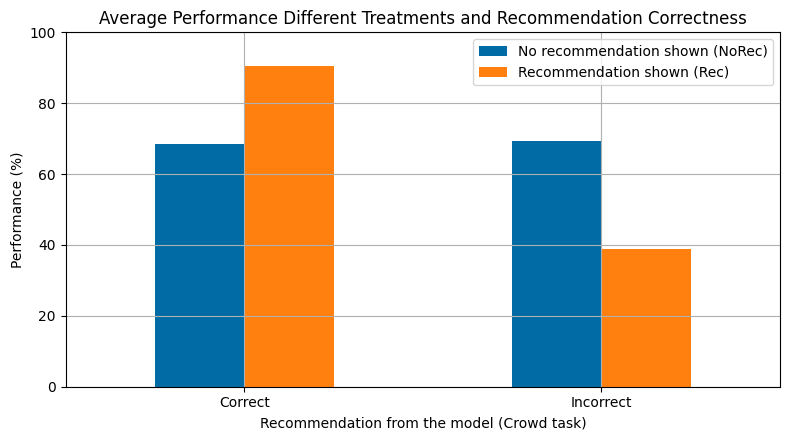

In [7]:
plot_performance_group(performance_crowds_category_df, data_type="crowds")

performance_crowds_category_df

<div style="border-left: 6px solid rgba(255, 193, 7, 1);border-radius:5px; box-shadow: 3px 3px 3px rgba(221, 221, 221, 1);" >
    <p style="background-color: rgba(255, 193, 7, 0.1); font-weight:bold; padding: 8px 0 8px 15px;">Reflection time</p>
    <div style="padding: 0 0 2px 10px;">

1. What influence do **correct** and **incorrect** ML recommendations have on the participants' performance?
3. Which seems to have the greater imapact?

</div></div>


<div style="border-left: 6px solid rgba(40, 167, 69, 1);border-radius:5px; box-shadow: 3px 3px 3px rgba(221, 221, 221, 1);" >
    <p style="background-color: rgba(40, 167, 69, 0.1); padding: 8px 0 8px 15px;"><strong>Feedback</strong> - Click on the "..." below <u>only once you have really tried to answer the question!</u></p>
</div>


<div style="border-left: 6px solid rgba(40, 167, 69, 1);border-radius:5px; box-shadow: 3px 3px 3px rgba(221, 221, 221, 1);" >
    <div style="padding: 0 0 2px 10px;">
        
Participants perform better when provided with a correct recommendation but worse when provided with an incorrect recommendation.

For the questions where the ML model had a correct recommendation, seeing the recommendation improved the performance rate by 22%.

For the questions where the ML model had an incorrect recommendation, seeing the recommendation reduced the performance rate by 30%.

Incorrect recommendations have a greater impact on the performance rate.

</div></div>


We would like to understand how could the incorrect ML recommendations influence very negatively the participants' performance. We could ask ourserveles if it comes from the expertise of the participants? Maybe the beginners rely too much on the ML recommendations?

## 1.2 The influence of expertise

We now want to explore the influence of the level of expertise of the participants. 

<div style="border-left: 6px solid rgba(69, 157, 185, 1);border-radius:5px; box-shadow: 3px 3px 3px rgba(221, 221, 221, 1);" >
    <p style="background-color: rgba(69, 157, 185, 0.1); font-weight:bold; padding: 8px 0 8px 15px;">Instructions</p>
    <div style="padding: 0 0 2px 10px;">
        
Execute the cell below to get the average score of participants by question category and by level of expertise.

</div></div> 

In [8]:
crowds_expertise_df = crowds_df.groupby("Expertise").mean()
crowds_expertise_df

Crowds Cor Rec  Crowds Incor Rec  Crowds Cor NoRec  \
Expertise                                                       
Beginner         4.520000          1.493333          3.533333   
Expert           4.533333          2.400000          3.320000   

           Crowds Incor NoRec  
Expertise                      
Beginner             3.640000  
Expert               3.306667

<div style="border-left: 6px solid rgba(69, 157, 185, 1);border-radius:5px; box-shadow: 3px 3px 3px rgba(221, 221, 221, 1);" >
    <p style="background-color: rgba(69, 157, 185, 0.1); font-weight:bold; padding: 8px 0 8px 15px;">Instructions</p>
    <div style="padding: 0 0 2px 10px;">
        
For this analysis, we will focus on **incorrect recommendations only**. 
From the `crowds_expertise_df` dataframe, extract the average score for incorrect recommendations (`Incor Rec` and `Incor NoRec`) **by expertise level** and compute the corresponding performance rate i.e. the percentage of questions answered correctly. 

The goal is to obtain the dataframe `performance_crowds_incorrect_df` with the following structure: 
    
|            | NoRec   | Rec   |
|------------|---------|-------|
| Beginner   | ...     | ...   |
| Expert     | ...     | ...   |


Complete the cell below.
</div></div> 

In [9]:
performance_incorrect_no_rec_begginer = (crowds_expertise_df["Crowds Incor NoRec"] / 5)[0] * 100 # SOLUTION
performance_incorrect_no_rec_expert = (crowds_expertise_df["Crowds Incor NoRec"] / 5)[1] * 100 # SOLUTION
performance_incorrect_rec_begginer = (crowds_expertise_df["Crowds Incor Rec"] / 5)[0] * 100 # SOLUTION
performance_incorrect_rec_expert = (crowds_expertise_df["Crowds Incor Rec"] / 5)[1] * 100 # SOLUTION

performance_crowds_incorrect_df = pd.DataFrame({
    "NoRec": [performance_incorrect_no_rec_begginer, performance_incorrect_no_rec_expert],
    "Rec": [performance_incorrect_rec_begginer, performance_incorrect_rec_expert]
}, index=["Beginner", "Expert"])

In [11]:
test.check("performance_incorrect")

performance_incorrect results: All test cases passed!

<div style="border-left: 6px solid rgba(69, 157, 185, 1);border-radius:5px; box-shadow: 3px 3px 3px rgba(221, 221, 221, 1);" >
    <p style="background-color: rgba(69, 157, 185, 0.1); font-weight:bold; padding: 8px 0 8px 15px;">Instructions</p>
    <div style="padding: 0 0 2px 10px;">
        
Execute the cell below to plot the results.
</div></div> 

NoRec        Rec
Beginner  72.800000  29.866667
Expert    66.133333  48.000000

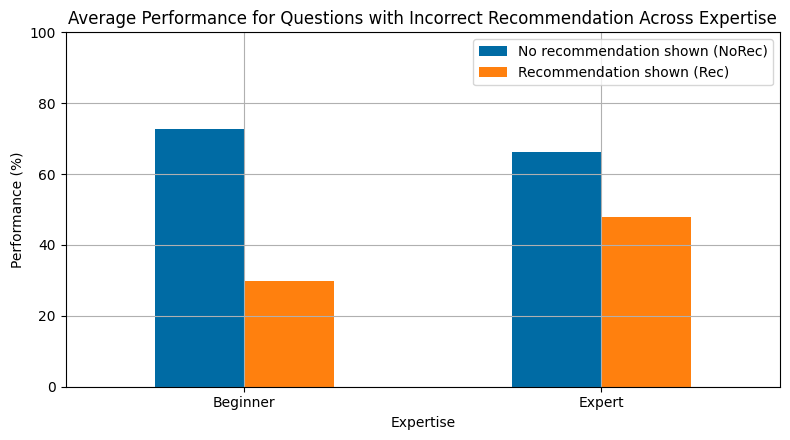

In [12]:
plot_performance_incorrect(performance_crowds_incorrect_df)

performance_crowds_incorrect_df

<div style="border-left: 6px solid rgba(255, 193, 7, 1);border-radius:5px; box-shadow: 3px 3px 3px rgba(221, 221, 221, 1);" >
    <p style="background-color: rgba(255, 193, 7, 0.1); font-weight:bold; padding: 8px 0 8px 15px;">Reflection time</p>
    <div style="padding: 0 0 2px 10px;">

1. Does the poor performance of the participants with incorrect recommendations only come from beginners?
2. Are participants able to trust themselves or do they rely on the recommendations from the ML model?
   
</div></div>


<div style="border-left: 6px solid rgba(40, 167, 69, 1);border-radius:5px; box-shadow: 3px 3px 3px rgba(221, 221, 221, 1);" >
    <p style="background-color: rgba(40, 167, 69, 0.1); padding: 8px 0 8px 15px;"><strong>Feedback</strong> - Click on the "..." below <u>only once you have really tried to answer the question!</u></p>
</div>


<div style="border-left: 6px solid rgba(40, 167, 69, 1);border-radius:5px; box-shadow: 3px 3px 3px rgba(221, 221, 221, 1);" >
    <div style="padding: 0 0 2px 10px;">
        
For both groups, performance drasticly decreases when they are provided with an incorrect recommendation. For the beginner group, the performance rate goes from 73% to 30% when provided with a recommendation. For the expert group, it goes from 66% to 48%. Even if the expert group is less impacted by the incorrect recommendation, they still are.

Participants rely too much on the recommendations of the ML model. They should be more critical about the system output.

</div></div>

## 1.3 Agreement rates
We can guess that participants are greatly infuenced by the ML recommendations. We would like to evaluate to which extent **participants tend to agree ML with the recommendations** depending on their expertise.

<div style="border-left: 6px solid rgba(69, 157, 185, 1);border-radius:5px; box-shadow: 3px 3px 3px rgba(221, 221, 221, 1);" >
    <p style="background-color: rgba(69, 157, 185, 0.1); font-weight:bold; padding: 8px 0 8px 15px;">Instructions</p>
    <div style="padding: 0 0 2px 10px;">
          
For this analysis we want to identify how often the participants **agreed with the recommendation** from the ML model.  

The agreement is defined as follows: 
- When the recommendation from the ML model is correct (shown or not), agreement means that the participants had the correct answer (so agreement = score).
- When the recommendation is incorrect (shown or not), agreement means that the participants had the incorrect answer (in this case agreement = 5 - score).

The agreement rate is the percentage of questions where the participant agreed with the recommendation of the ML model.
  
Let's take as an example the first participant of the dataframe `crowds_df`, compute the agreement rate with the ML model for Rec (recommendation shown) and NoRec (recommendation not shown) questions. Use the `first_participant` define below. Express the agreement rate as a percentage of the number of questions.

</div></div> 

In [13]:
first_participant = crowds_df.head(1).copy().iloc[0]
crowds_df.head(1)

Crowds Cor Rec  Crowds Incor Rec  Crowds Cor NoRec  Crowds Incor NoRec  \
0               4                 1                 2                   4   

  Expertise  
0  Beginner

In [14]:
first_particpant_agreement_no_rec = (first_participant["Crowds Cor NoRec"] + 5 - first_participant["Crowds Incor NoRec"])/10*100 # SOLUTION
first_particpant_agreement_rec = (first_participant["Crowds Cor Rec"] + 5 - first_participant["Crowds Incor Rec"])/10*100 # SOLUTION

print("The agreement rate for the first participant without ML recommandation is ", first_particpant_agreement_no_rec, "%", "and with ML recommandation is ", first_particpant_agreement_rec, "%") 

The agreement rate for the first participant without ML recommandation is  30.0 % and with ML recommandation is  80.0 %


In [16]:
test.check("agreement_first_participant")

agreement_first_participant results: All test cases passed!

<div style="border-left: 6px solid rgba(69, 157, 185, 1);border-radius:5px; box-shadow: 3px 3px 3px rgba(221, 221, 221, 1);" >
    <p style="background-color: rgba(69, 157, 185, 0.1); font-weight:bold; padding: 8px 0 8px 15px;">Instructions</p>
    <div style="padding: 0 0 2px 10px;">

Now that you successfully computed the agreement rate for the first participant, the goal is to compute the agreement rate depending on the expertise level of the participants.      

From the `crowds_expertise_df` dataframe, extract the average score for the 4 categories of questions by expertise level and compute the corresponding agreement rate i.e. the percentage of questions where participants agreed with the model. 

The goal is to obtain the `agreement_crowds_expertise_df` dataframe with the following structure:
|            | NoRec   | Rec   |
|------------|---------|-------|
| Beginner   | ...     | ...   |
| Expert     | ...     | ...   |


Complete the cell below.
</div></div> 

In [17]:
agreement_expertise_no_rec =  (crowds_expertise_df["Crowds Cor NoRec"] + 5 - crowds_expertise_df["Crowds Incor NoRec"]) / 10 * 100 # SOLUTION
agreement_expertise_rec =  (crowds_expertise_df["Crowds Cor Rec"] + 5 - crowds_expertise_df["Crowds Incor Rec"]) / 10 * 100 # SOLUTION

print(agreement_expertise_no_rec)

agreement_begginer_no_rec = agreement_expertise_no_rec[0] # SOLUTION
agreement_expert_no_rec = agreement_expertise_no_rec[1] # SOLUTION
agreement_begginer_rec = agreement_expertise_rec[0] # SOLUTION
agreement_expert_rec = agreement_expertise_rec[1] # SOLUTION

agreement_crowds_expertise_df = pd.DataFrame({
    "NoRec": [agreement_begginer_no_rec, agreement_expert_no_rec],
    "Rec": [agreement_begginer_rec, agreement_expert_rec]
}, index=["Beginner", "Expert"])

Expertise
Beginner    48.933333
Expert      50.133333
dtype: float64


In [19]:
test.check("agreement_expertise")

agreement_expertise results: All test cases passed!

<div style="border-left: 6px solid rgba(69, 157, 185, 1);border-radius:5px; box-shadow: 3px 3px 3px rgba(221, 221, 221, 1);" >
    <p style="background-color: rgba(69, 157, 185, 0.1); font-weight:bold; padding: 8px 0 8px 15px;">Instructions</p>
    <div style="padding: 0 0 2px 10px;">
        
Execute the cell below to plot the results.
</div></div> 

NoRec        Rec
Beginner  48.933333  80.266667
Expert    50.133333  71.333333

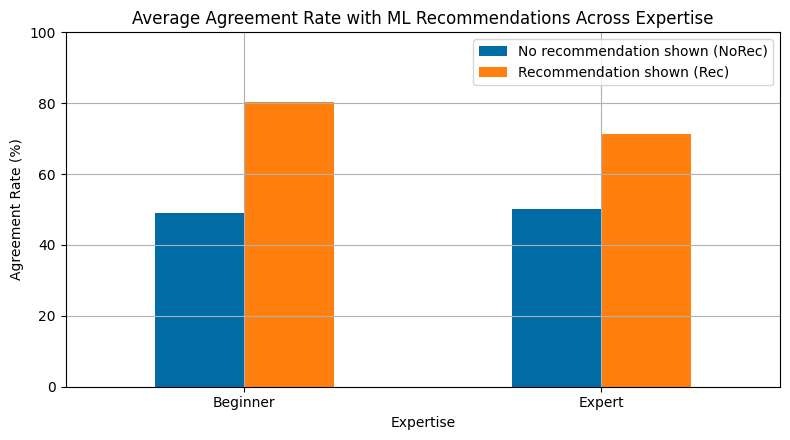

In [20]:
plot_agreement_rate_expertise(agreement_crowds_expertise_df)

agreement_crowds_expertise_df

<div style="border-left: 6px solid rgba(255, 193, 7, 1);border-radius:5px; box-shadow: 3px 3px 3px rgba(221, 221, 221, 1);" >
    <p style="background-color: rgba(255, 193, 7, 0.1); font-weight:bold; padding: 8px 0 8px 15px;">Reflection time</p>
    <div style="padding: 0 0 2px 10px;">

Compare the agreement rate for experts and beginners when provided with a recommandation and whitout one. Which group relies less on the recommandations from the ML model?
   
</div></div>


<div style="border-left: 6px solid rgba(40, 167, 69, 1);border-radius:5px; box-shadow: 3px 3px 3px rgba(221, 221, 221, 1);" >
    <p style="background-color: rgba(40, 167, 69, 0.1); padding: 8px 0 8px 15px;"><strong>Feedback</strong> - Click on the "..." below <u>only once you have really tried to answer the question!</u></p>
</div>


<div style="border-left: 6px solid rgba(40, 167, 69, 1);border-radius:5px; box-shadow: 3px 3px 3px rgba(221, 221, 221, 1);" >
    <div style="padding: 0 0 2px 10px;">


When provided with a recommendation, the agreement rate is higher for the beginner group (from 50% to 80%) than for the expert group (from 50% to 71%). The expert group relies less on the ML recommendations.        

</div></div>

## 1.4 - Conclusion

<div style="border-left: 6px solid rgba(69, 157, 185, 1);border-radius:5px; box-shadow: 3px 3px 3px rgba(221, 221, 221, 1);" >
    <p style="background-color: rgba(69, 157, 185, 0.1); font-weight:bold; padding: 8px 0 8px 15px;">Instructions</p>
    <div style="padding: 0 0 2px 10px;">
        
Execute the cell below to see the graphs of all the results we have obtained so far.
</div></div> 

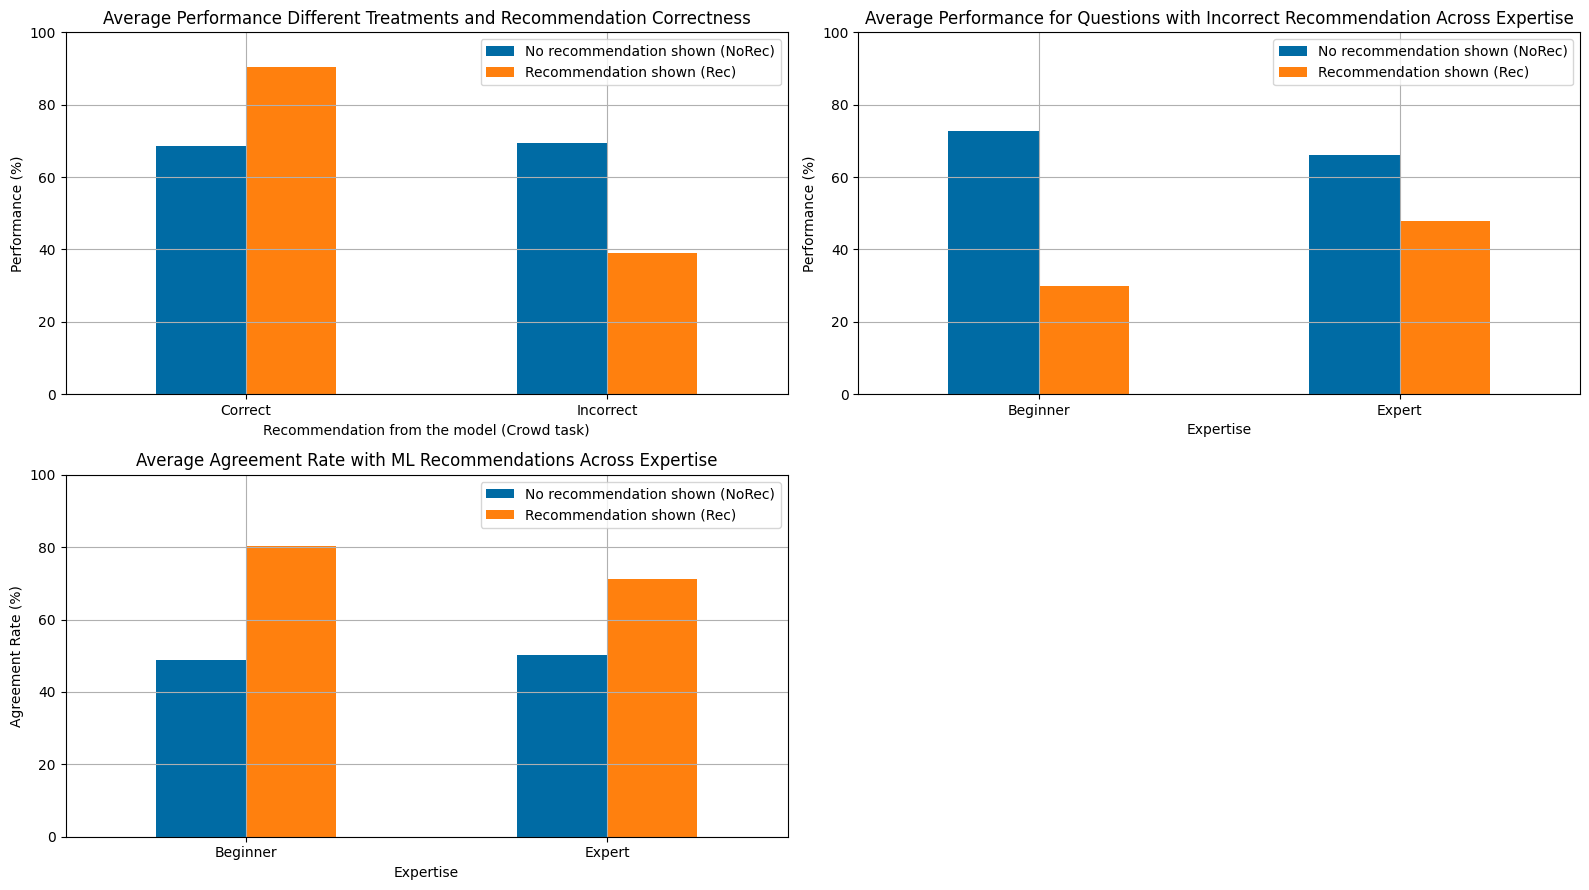

In [21]:
plot_all_subplots(agreement_crowds_expertise_df, performance_crowds_category_df, performance_crowds_incorrect_df, data_type="crowds")

<div style="border-left: 6px solid rgba(255, 193, 7, 1);border-radius:5px; box-shadow: 3px 3px 3px rgba(221, 221, 221, 1);" >
    <p style="background-color: rgba(255, 193, 7, 0.1); font-weight:bold; padding: 8px 0 8px 15px;">Reflection time</p>
    <div style="padding: 0 0 2px 10px;">

Based on your analysis of the results, explain the main characteriscits of automation bias (e.g. in which situation does it arise and for whom).
   
</div></div>


<div style="border-left: 6px solid rgba(40, 167, 69, 1);border-radius:5px; box-shadow: 3px 3px 3px rgba(221, 221, 221, 1);" >
    <p style="background-color: rgba(40, 167, 69, 0.1); padding: 8px 0 8px 15px;"><strong>Feedback</strong> - Click on the "..." below <u>only once you have really tried to answer the question!</u></p>
</div>


<div style="border-left: 6px solid rgba(40, 167, 69, 1);border-radius:5px; box-shadow: 3px 3px 3px rgba(221, 221, 221, 1);" >
    <div style="padding: 0 0 2px 10px;">
        
From the results above we can conclude that the main characteristics of automation bias are:
- Users tend to have more confidence in automated systems than in themselves.
- Users tend to follow recommendations even when:
    - The output is incorrect
	- They would have made the correct decision on their own

</div></div>

# PART 2: Generalization of the results

These conclusions we formulated might be only valid for the crowd analysis task. We would like to see if the same conclusions can be drawn for another task or if it is specific to the crowd analysis task.

We now consider a different task: **Animal Analysis Questions**. Participants were shown images of animals and asked to identify which animal was present in the image out of two close species.

Here is one example image from this task where the two possible choices are Beaver or Marmot:  
   <div style="padding:10px 10px;"><img src="img/animal_example.png" width="150"/></div>

We created new columns on the datraframe to include the Animals results.

In [22]:
df.head()

Crowds Cor Rec  Crowds Incor Rec  Crowds Cor NoRec  Crowds Incor NoRec  \
0               4                 1                 2                   4   
1               4                 1                 4                   4   
2               5                 2                 3                   3   
3               5                 2                 4                   3   
4               5                 2                 3                   2   

   Animals Cor Rec  Animals Incor Rec  Animals Cor NoRec  Animals Incor NoRec  \
0                5                  1                  3                    4   
1                4                  1                  5                    3   
2                4                  1                  4                    3   
3                5                  1                  3                    1   
4                5                  0                  3                    3   

  Expertise  
0  Beginner  
1  Beginner  
2    Expert  
3  Beginner  
4  Beginner

In [23]:
expertise_df = df.groupby("Expertise").mean()
expertise_df

Crowds Cor Rec  Crowds Incor Rec  Crowds Cor NoRec  \
Expertise                                                       
Beginner         4.520000          1.493333          3.533333   
Expert           4.533333          2.400000          3.320000   

           Crowds Incor NoRec  Animals Cor Rec  Animals Incor Rec  \
Expertise                                                           
Beginner             3.640000         4.520000           1.066667   
Expert               3.306667         4.466667           1.213333   

           Animals Cor NoRec  Animals Incor NoRec  
Expertise                                          
Beginner            3.040000             3.013333  
Expert              2.946667             3.000000

## 2.1 - Result from the animal analysis task

Here are the same plots as in the crowd task but for the animal analysis task:

<div style="border-left: 6px solid rgba(69, 157, 185, 1);border-radius:5px; box-shadow: 3px 3px 3px rgba(221, 221, 221, 1);" >
    <p style="background-color: rgba(69, 157, 185, 0.1); font-weight:bold; padding: 8px 0 8px 15px;">Instructions</p>
    <div style="padding: 0 0 2px 10px;">
        
Execute the cell below to plot the results.
</div></div> 

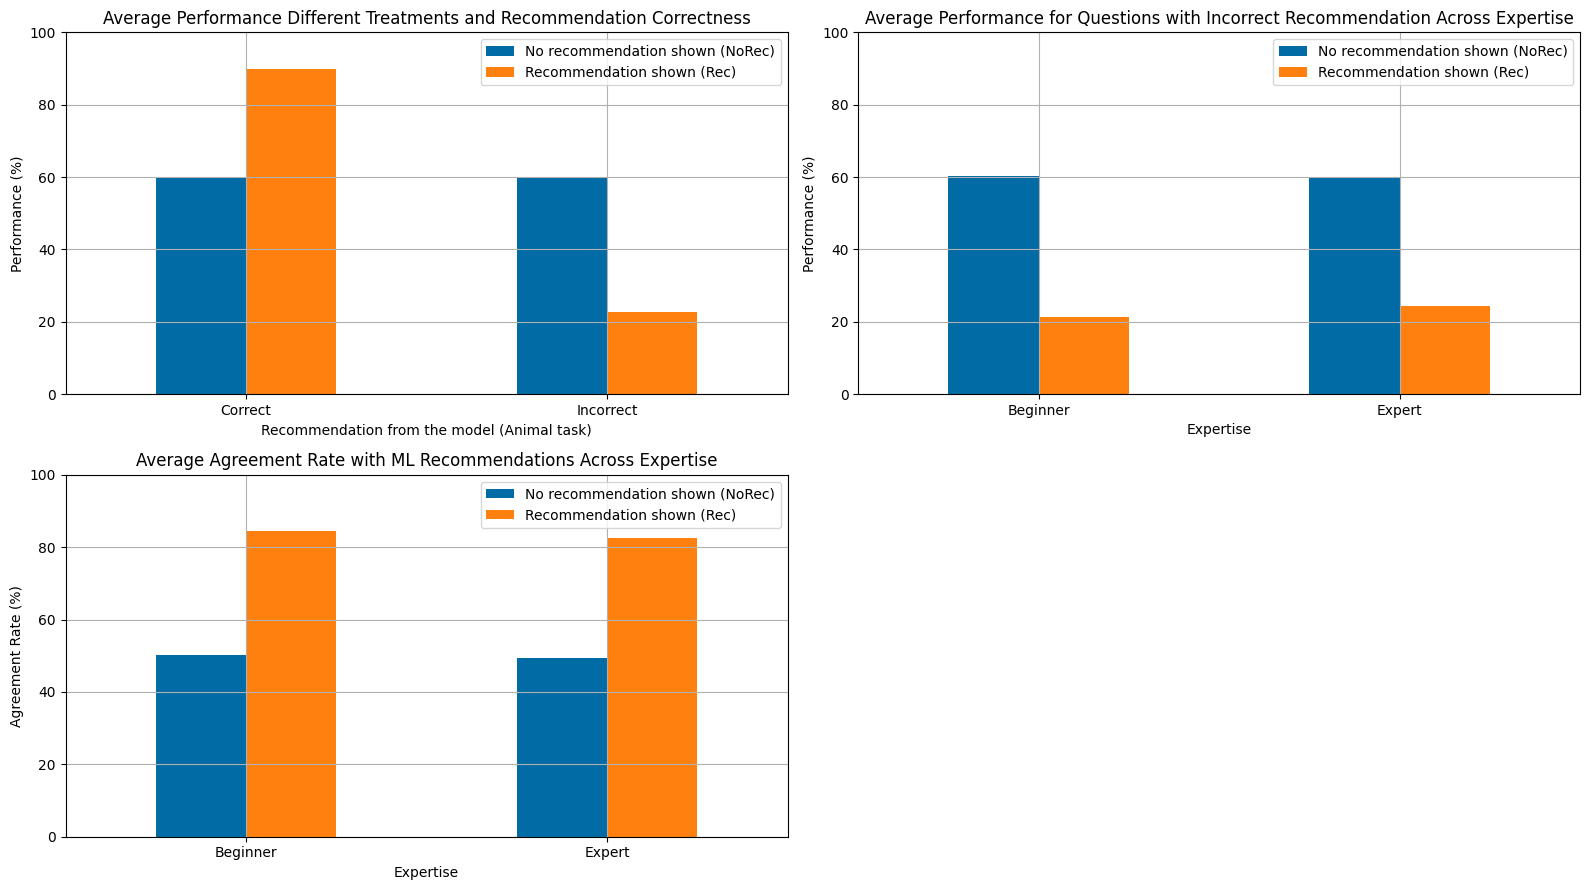

In [24]:
plot_animal_all_subplots(df, expertise_df)

<div style="border-left: 6px solid rgba(255, 193, 7, 1);border-radius:5px; box-shadow: 3px 3px 3px rgba(221, 221, 221, 1);" >
    <p style="background-color: rgba(255, 193, 7, 0.1); font-weight:bold; padding: 8px 0 8px 15px;">Reflection time</p>
    <div style="padding: 0 0 2px 10px;">

Do you see any differences in the results for this task? Do your conclusions from PART 1 apply also to the animal analysis task? 

</div></div>


<div style="border-left: 6px solid rgba(40, 167, 69, 1);border-radius:5px; box-shadow: 3px 3px 3px rgba(221, 221, 221, 1);" >
    <p style="background-color: rgba(40, 167, 69, 0.1); padding: 8px 0 8px 15px;"><strong>Feedback</strong> - Click on the "..." below <u>only once you have really tried to answer the question!</u></p>
</div>


<div style="border-left: 6px solid rgba(40, 167, 69, 1);border-radius:5px; box-shadow: 3px 3px 3px rgba(221, 221, 221, 1);" >
    <div style="padding: 0 0 2px 10px;">
        
The automation bias seems to have even more impact on the participants' performance for the animal analysis task. The performance rate decreases by 40% when the participants are provided with an incorrect recommendation (from 60% to 20%) comaared to the 30% decrease for the crowd analysis task.

Overall the graphs are evry similar and we can conclude that the observations are the same hence our conclusions also apply to this other task.

</div></div>

## 2.2 Comparison between the tasks
Lets remember that our model gives as many correct as incorrect recommendations in the setup used for this study: on a total of 10 questions with the ML recommendations (Rec) there are 5 questions with correct recommendations and 5 with incorrect recommendations.  
This means that, as seen from the partcipants, it has an accuracy of 50%.

Let's plot the performance again with animal and crowd analysis tasks. We want to better understand the impact of the ML recommendations on the participants' performance. 

NoRec        Rec
Animals Cor    59.866667  89.866667
Animals Incor  60.133333  22.800000
Crowds Cor     68.533333  90.533333
Crowds Incor   69.466667  38.933333

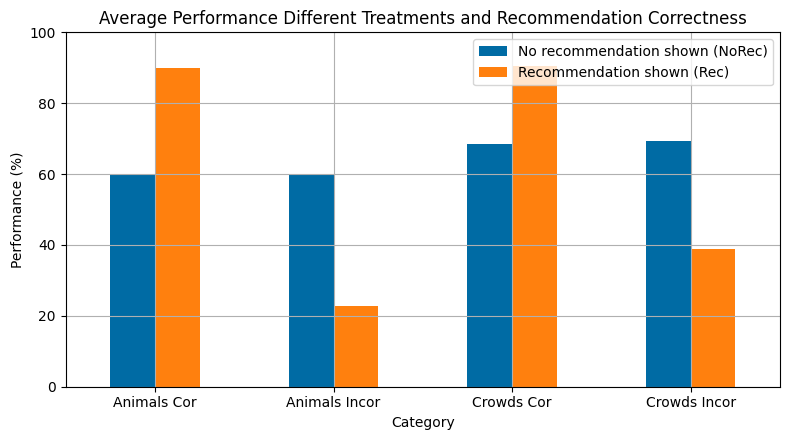

In [25]:
plot_whole_performance_group(df)

<div style="border-left: 6px solid rgba(255, 193, 7, 1);border-radius:5px; box-shadow: 3px 3px 3px rgba(221, 221, 221, 1);" >
    <p style="background-color: rgba(255, 193, 7, 0.1); font-weight:bold; padding: 8px 0 8px 15px;">Reflection time</p>
    <div style="padding: 0 0 2px 10px;">

1. How accurate do you think the participants think the model is: more accurate or less accurate than themselves?
2. What could be the effect(s) of using a more accurate model?
3. How could we reduce the effect of automation bias?

</div></div>


<div style="border-left: 6px solid rgba(40, 167, 69, 1);border-radius:5px; box-shadow: 3px 3px 3px rgba(221, 221, 221, 1);" >
    <p style="background-color: rgba(40, 167, 69, 0.1); padding: 8px 0 8px 15px;"><strong>Feedback</strong> - Click on the "..." below <u>only once you have really tried to answer the question!</u></p>
</div>


<div style="border-left: 6px solid rgba(40, 167, 69, 1);border-radius:5px; box-shadow: 3px 3px 3px rgba(221, 221, 221, 1);" >
    <div style="padding: 0 0 2px 10px;">
        
1. While particpants know how to answer the questions with a relatively good accuracy by themselves (60% for animals and 70% for crowds), they seem to think the ML model is better than them, which it is not, and hence discard their own judgment.

2. With a more accurate model, the overall performance would probably improve. However, they would still be less performant when provided with an incorrect recommendation. Even worse, they could tend to rely even more on the model and would be even more impacted by the incorrect recommendations (we will see in the videos that this effect exist and is called .

3. One possibility to mitigate automation bias would be to provide participants with more information about the model to make them aware of the type of model and its errors. Another option would be to provide information with the output of the model, like confidence intervals for instance, so that participants can evaluate how much they can trust the recommendation. We could also see if the way we present the recommendation of the model has an effect on the reliance of participants. Another option would be to provide them with training on automation bias.  
NB: all these options have been and are explored by researchers, some of them have an effect (modifying the display, training), others not so much or even have an opposite effect (e.g. confidence information).

</div></div>

# PART 3: Implications of the study

The two tasks we studied highlighted the presence of automation bias. However these tasks do not really have consequences on the real world.  
Let's now focus on a task where ML models are increasingly used and that has real-world consequences: medical diagnosis.

We take the example of mammography, a medical imaging technique used to detect breast cancer.  
A ML model could be used to help radiologists in their diagnosis.

We want to understand the impact automation bias could have in this context.


<div style="border-left: 6px solid rgba(255, 193, 7, 1);border-radius:5px; box-shadow: 3px 3px 3px rgba(221, 221, 221, 1);" >
    <p style="background-color: rgba(255, 193, 7, 0.1); font-weight:bold; padding: 8px 0 8px 15px;">3.1 - Reflection time</p>
    <div style="padding: 0 0 2px 10px;">

1. When the ML model is correct, what would be the impact on the radiologists' performance?
2. When the ML model is incorrect, what would be the impact on the radiologists' performance?
</div></div>


<div style="border-left: 6px solid rgba(40, 167, 69, 1);border-radius:5px; box-shadow: 3px 3px 3px rgba(221, 221, 221, 1);" >
    <p style="background-color: rgba(40, 167, 69, 0.1); padding: 8px 0 8px 15px;"><strong>Feedback</strong> - Click on the "..." below <u>only once you have really tried to answer the question!</u></p>
</div>


<div style="border-left: 6px solid rgba(40, 167, 69, 1);border-radius:5px; box-shadow: 3px 3px 3px rgba(221, 221, 221, 1);" >
    <div style="padding: 0 0 2px 10px;">
        
1. When the mammography ML model is correct, the radiologists' performance would improve. They would be able to detect more cases of breast cancer and would be more confident in their diagnosis.
2. When the mammography ML model is incorrect, the radiologists' performance would decrease. We need to distinguish between two categories of incorrect classifications: false positives where a cancer is diagnosed where there is none, and false negatives where a cancer is not detected where it should. While both errors have negative impacts, as we have seen in another notebook, the false negatives combined with automation bias would mean that radiologists would be at higher risk of missing cases of breast cancer.

</div></div>

<div style="border-left: 6px solid rgba(255, 193, 7, 1);border-radius:5px; box-shadow: 3px 3px 3px rgba(221, 221, 221, 1);" >
    <p style="background-color: rgba(255, 193, 7, 0.1); font-weight:bold; padding: 8px 0 8px 15px;">3.2 - Reflection time</p>
    <div style="padding: 0 0 2px 10px;">

What's the dilemma of using an ML model in medical diagnosis?
</div></div>


<div style="border-left: 6px solid rgba(40, 167, 69, 1);border-radius:5px; box-shadow: 3px 3px 3px rgba(221, 221, 221, 1);" >
    <p style="background-color: rgba(40, 167, 69, 0.1); padding: 8px 0 8px 15px;"><strong>Feedback</strong> - Click on the "..." below <u>only once you have really tried to answer the question!</u></p>
</div>


<div style="border-left: 6px solid rgba(40, 167, 69, 1);border-radius:5px; box-shadow: 3px 3px 3px rgba(221, 221, 221, 1);" >
    <div style="padding: 0 0 2px 10px;">
        
The dilema is that the radiologist would be overall more performant with the help of the ML model. However, when provided with an incorrect recommendation, while the radiologist would probably be able to detect the error, they would be less confident in their diagnosis and would be more likely to miss cases of breast cancer.

</div></div>

For this part of the notebook, we have derived our analysis from this study:

Dratsch, Chen et. al. (2023). Automation Bias in Mammography: The Impact of Artificial Intelligence BI-RADS Suggestions on Reader Performance. *Radiology*, 307(4), e222176. https://doi.org/10.1148/radiol.222176